In [1]:
import os
import yaml

import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def load_config(config_file):
    with open(config_file) as f:
        config = yaml.load(f)
    return config

In [4]:
hpo_dir = os.path.expandvars('$SCRATCH/sc18-dl-tutorial/cifar-resnet-hpo')

dirs = [os.path.join(hpo_dir, p) for p in os.listdir(hpo_dir)]

# Take the jobs which finished
dirs = [d for d in dirs if 'history.npz' in os.listdir(d)]

In [5]:
# Load the configurations and training histories for these runs
configs = [load_config(os.path.join(d, 'config.yaml')) for d in dirs]
histories = [np.load(os.path.join(d, 'history.npz')) for d in dirs]

# Find best validation accuracies in each run
best_val_accs = np.array([h['val_acc'].max() for h in histories])

# Best overall
i_best = best_val_accs.argmax()
# Worst overall
i_worst = best_val_accs.argmin()

In [6]:
def draw_history(h):
    plt.figure(figsize=(9,4))
    # Loss
    plt.subplot(121)
    plt.plot(h['loss'], label='Training')
    plt.plot(h['val_loss'], label='Validation')
    plt.xlim((0, len(h['loss'])-1))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc=0)
    # Accuracy
    plt.subplot(122)
    plt.plot(h['acc'], label='Training')
    plt.plot(h['val_acc'], label='Validation')
    plt.xlim((0, len(h['loss'])-1))
    plt.ylim((0, 1))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc=0)
    plt.tight_layout()

{'data': {'name': 'cifar10'},
 'description': 'ResNet CIFAR10',
 'model': {'dropout': 0.10330823772579245,
  'input_shape': [32, 32, 3],
  'n_classes': 10,
  'name': 'resnet18_cifar'},
 'optimizer': {'lr': 5e-05, 'name': 'RMSprop'},
 'output_dir': '/global/cscratch1/sd/sfarrell/sc18-dl-tutorial/cifar-resnet-hpo/hp_55',
 'training': {'batch_size': 32,
  'loss': 'categorical_crossentropy',
  'lr_warmup_epochs': 1,
  'metrics': ['accuracy', 'top_k_categorical_accuracy'],
  'n_epochs': 16}}

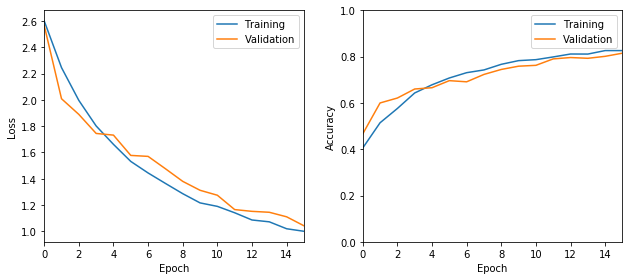

In [7]:
# Plot curves for the best one
draw_history(histories[i_best])
configs[i_best]

In [11]:
h = histories[i_best]

In [14]:
h['val_acc']

array([0.4663, 0.6   , 0.6213, 0.6603, 0.6659, 0.6964, 0.6914, 0.7233,
       0.7448, 0.7589, 0.7626, 0.7904, 0.7963, 0.793 , 0.8015, 0.8152])

{'data': {'name': 'cifar10'},
 'description': 'ResNet CIFAR10',
 'model': {'dropout': 0.5318940378651195,
  'input_shape': [32, 32, 3],
  'n_classes': 10,
  'name': 'resnet18_cifar'},
 'optimizer': {'lr': 5e-05, 'name': 'Adadelta'},
 'output_dir': '/global/cscratch1/sd/sfarrell/sc18-dl-tutorial/cifar-resnet-hpo/hp_0',
 'training': {'batch_size': 32,
  'loss': 'categorical_crossentropy',
  'lr_warmup_epochs': 7,
  'metrics': ['accuracy', 'top_k_categorical_accuracy'],
  'n_epochs': 16}}

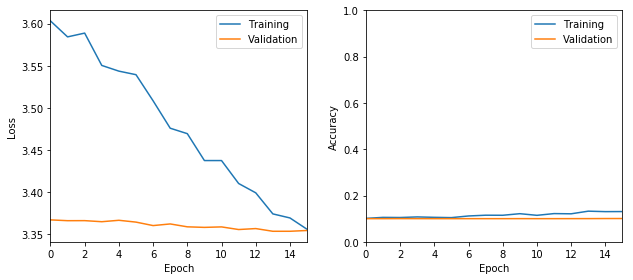

In [8]:
# Plot curves for the worst one
draw_history(histories[i_worst])
configs[i_worst]

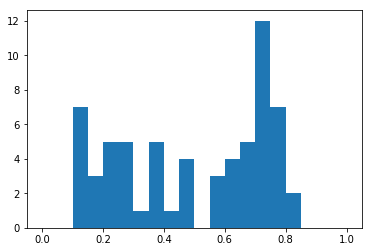

In [9]:
# Plot a histogram of the best accuracies
plt.figure()
plt.hist(best_val_accs, bins=20, range=(0, 1));